In [1]:
import praw
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

In [24]:
comments=pd.read_csv('comments_final.csv',index_col=[0])
users=pd.read_csv('users_final.csv',index_col=[0])
posts=pd.read_csv('posts_final.csv',index_col=[0])

In [25]:
posts.head(5)

,id,score,text,author,num_comments,ups,downs,subreddit
0,upq73b,265,BEST of...Signs at Bans Off Our Bodies Marches,QuarterBackground,14,265,0,roevwade2022
1,us1x3f,213,Pro-lifers have spent decades using litigation...,gear-heads,6,213,0,roevwade2022
2,umvmof,174,RvW,DuhK_14,15,174,0,roevwade2022
3,uoxwtv,153,Made signs for the protest tomorrow,HubrisAndScandals,14,153,0,roevwade2022
4,urd3zb,144,Roe Art - missed protests due to lack of babys...,Loud-Resolution5514,6,144,0,roevwade2022


In [302]:
users[409:415]

id  score              author  num_comments        subreddit  \
409  ulhwmx     20  LegalPreference470             0      MoscowIdaho   
410  uqjplr     16  LegalPreference470            27      MoscowIdaho   
411  um62u6      8  LegalPreference470             1        prochoice   
412  umtqrc      0  LegalPreference470            38             lgbt   
413  uj43xj  35786   HubrisAndScandals          1169  HermanCainAward   
414  sxry86  15367   HubrisAndScandals          2908  HermanCainAward   

     sub_num_subscribers  \
409                 3004   
410                 3004   
411                27388   
412               896266   
413               504664   
414               504664   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [27]:
comments.head(5)

,id,score,text,ups,downs,author,subreddit
0,i8mb2ci,37,“Ruth sent me” made me cry. These are amazing.,37,0,Suspicious_Cupcakes,roevwade2022
1,i8mc1uw,31,Loved them all. Especially ‘Those SCOTUS fucks...,31,0,kgleas01,roevwade2022
2,i8mbihw,25,These are fabulous!\n\nHere's some links that ...,25,0,JennyLunetti,roevwade2022
3,i8mjeet,17,For me the best one was 'respect my existence ...,17,0,cjjforever,roevwade2022
4,i8mesuo,14,THAT LAST PICTURE. IM SO FUCKING PROUD!!!!!!!,14,0,throw_998,roevwade2022


In [30]:
print(comments.shape)
print(users.shape)
print(posts.shape)

(832, 7)
(16142, 7)
(269, 8)


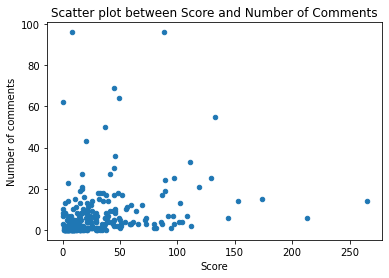

In [291]:
# See the relationship between comments and upvotes on the posts
ax = posts.plot('score', 'num_comments', kind = 'scatter', title='Scatter plot between Score and Number of Comments')
ax.set(xlabel="Score", ylabel="Number of comments")
plt.savefig("ScatterPlot",dpi=150, bbox_inches='tight',pad_inches=0.5)

In [38]:
repeating_commentors = comments[comments.duplicated(['author'], keep = False)] # Only take users who commented more than once
repeating_commentors = repeating_commentors[repeating_commentors.author != 'None'] # Get rid of deleted users
repeating_commentors.author.nunique() # Out of 500 posts, this is the amount of people who posted more than once 

127

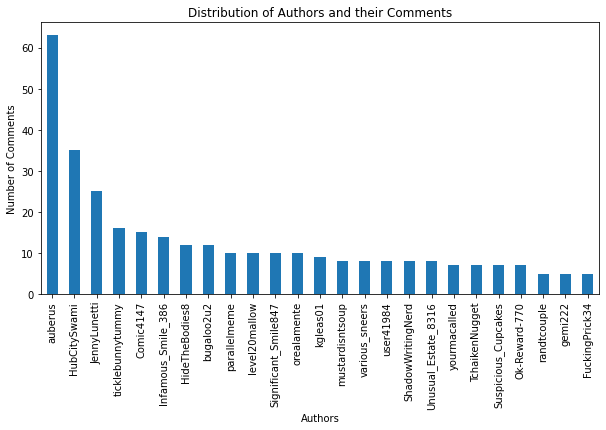

In [292]:
# See the distrubution of authors and their posts
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(10)
ax = repeating_commentors.author.value_counts().head(25).plot(kind='bar',title='Distribution of Authors and their Comments') 
ax.set(xlabel="Authors", ylabel="Number of Comments")
plt.savefig("top25commentors.png",dpi=150, bbox_inches='tight',pad_inches=0.5)

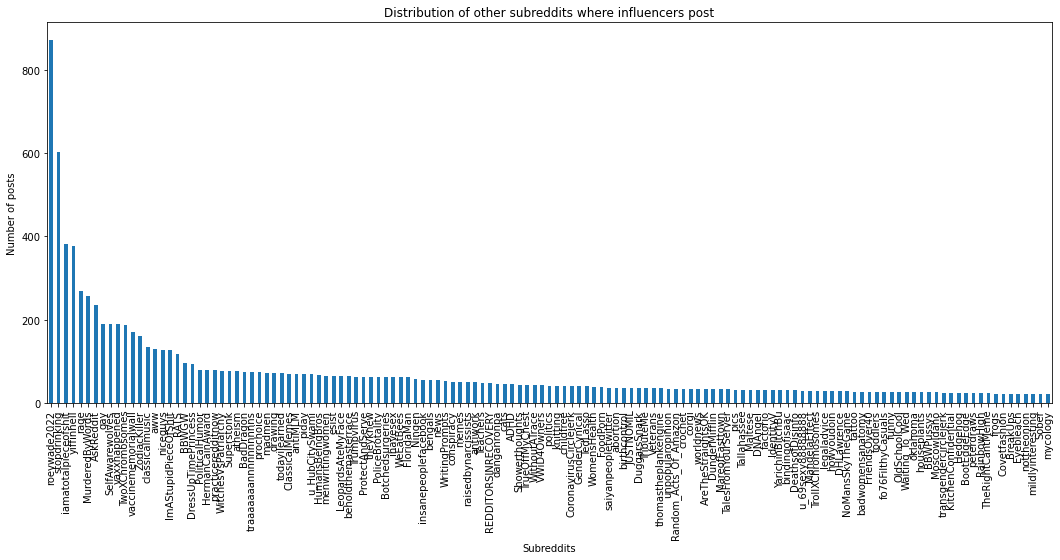

In [100]:
counts = users['subreddit'].value_counts() 
# Only plot the subreddits that appear more than twice
fig = plt.figure()
fig.set_figheight(7)
fig.set_figwidth(18)
ax = users[users['subreddit'].isin(counts[counts > 20].index)].subreddit.value_counts().plot(kind='bar',title='Distribution of other subreddits where influencers post') 
ax.set(xlabel="Subreddits", ylabel="Number of posts")
plt.savefig("BargraphSubreddits",dpi=150, bbox_inches='tight',pad_inches=0.5)

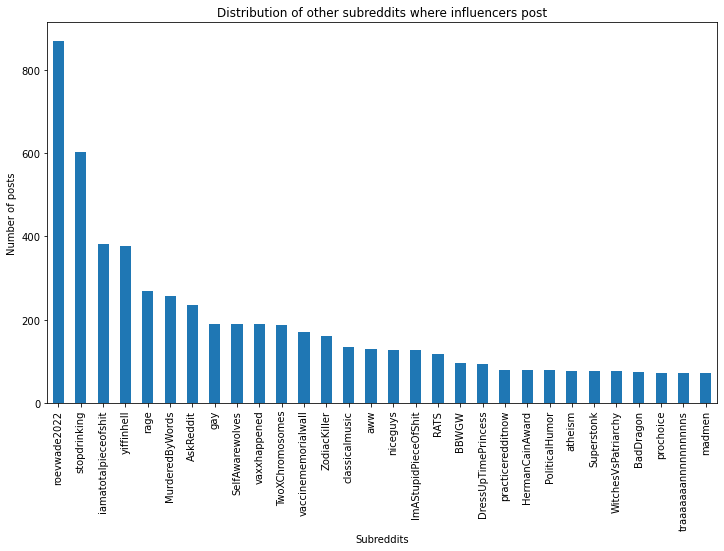

In [99]:

counts = users['subreddit'].value_counts() 
# Only plot the subreddits that appear more than twice
fig = plt.figure()
fig.set_figheight(7)
fig.set_figwidth(12)
ax = users[users['subreddit'].isin(counts[counts > 10].index)].subreddit.value_counts().head(30).plot(kind='bar',title='Distribution of other subreddits where influencers post') 
ax.set(xlabel="Subreddits", ylabel="Number of posts")
plt.savefig("BargraphSubreddits",dpi=150, bbox_inches='tight',pad_inches=0.5)

In [201]:
top_subreddits = pd.DataFrame(users[users['subreddit'].isin(counts[counts > 10].index)].subreddit.value_counts().head(100)).reset_index()
top_subreddits.columns=['subreddit','count']
top_subreddits

,subreddit,count
0,roevwade2022,871
1,stopdrinking,602
2,iamatotalpieceofshit,382
3,yiffinhell,378
4,rage,268
...,...,...
95,IdentityV,30
96,DNAngel,30
97,DeathsofDisinfo,30
98,Tallahassee,30


In [168]:
top_subreddits=top_subreddits.merge(users, on='subreddit', how='inner').drop_duplicates('subreddit')
top_subreddits=top_subreddits[['subreddit','count','sub_num_subscribers_x','subred_desc_x']]
top_subreddits.columns=['subreddit', 'count', 'sub_num_subscribers', 'subred_desc']
top_subreddits.dropna()
pd.set_option("display.max_colwidth", None)
top_subreddits

subreddit  count  sub_num_subscribers  \
0             roevwade2022    871                 2197   
871           stopdrinking    602               360558   
1473  iamatotalpieceofshit    382              1786015   
1855            yiffinhell    378               155047   
2233                  rage    268               402870   
2501       MurderedByWords    256              2705959   
2757             AskReddit    236             35876764   
2993                   gay    189               302960   
3182       SelfAwarewolves    189               571602   
3371          vaxxhappened    189               371943   
3560       TwoXChromosomes    188             13351854   
3748   vaccinememorialwall    170                 1221   
3918          ZodiacKiller    160                61434   
4078        classicalmusic    134              1383163   
4212                   aww    130             31157290   
4342              niceguys    127              1472386   
4469  ImAStupidPieceOfShit    126                 7857   
4595                  RATS    118               197828   
4713                 BBWGW     95               151070   
4808   DressUpTimePrincess     93                 9809   
4901     practiceredditnow     80                    0   
4981       HermanCainAward     80               504664   
5061        PoliticalHumor     80              1508616   
5141               atheism     77              2721463   
5218            Superstonk     77               782746   
5295   WitchesVsPatriarchy     77               517853   
5372             BadDragon     75               393729   
5447             prochoice     73                27388   
5520  traaaaaaannnnnnnnnns     73               324926   
5593                madmen     72                94235   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

## Network

In [204]:
n_df = users[['author', 'subreddit']] # Create a dataframe for network graph purposes 
#n_df = n_df[n_df.subreddit != 'roevwade2022']

n_df.head()

,author,subreddit
0,kgleas01,BoJackHorseman
1,kgleas01,roevwade2022
2,kgleas01,VickiWhite
3,kgleas01,roevwade2022
4,kgleas01,madmen


In [205]:
subs = list(top_subreddits.subreddit.unique())
u_authors=list(users.author.unique())

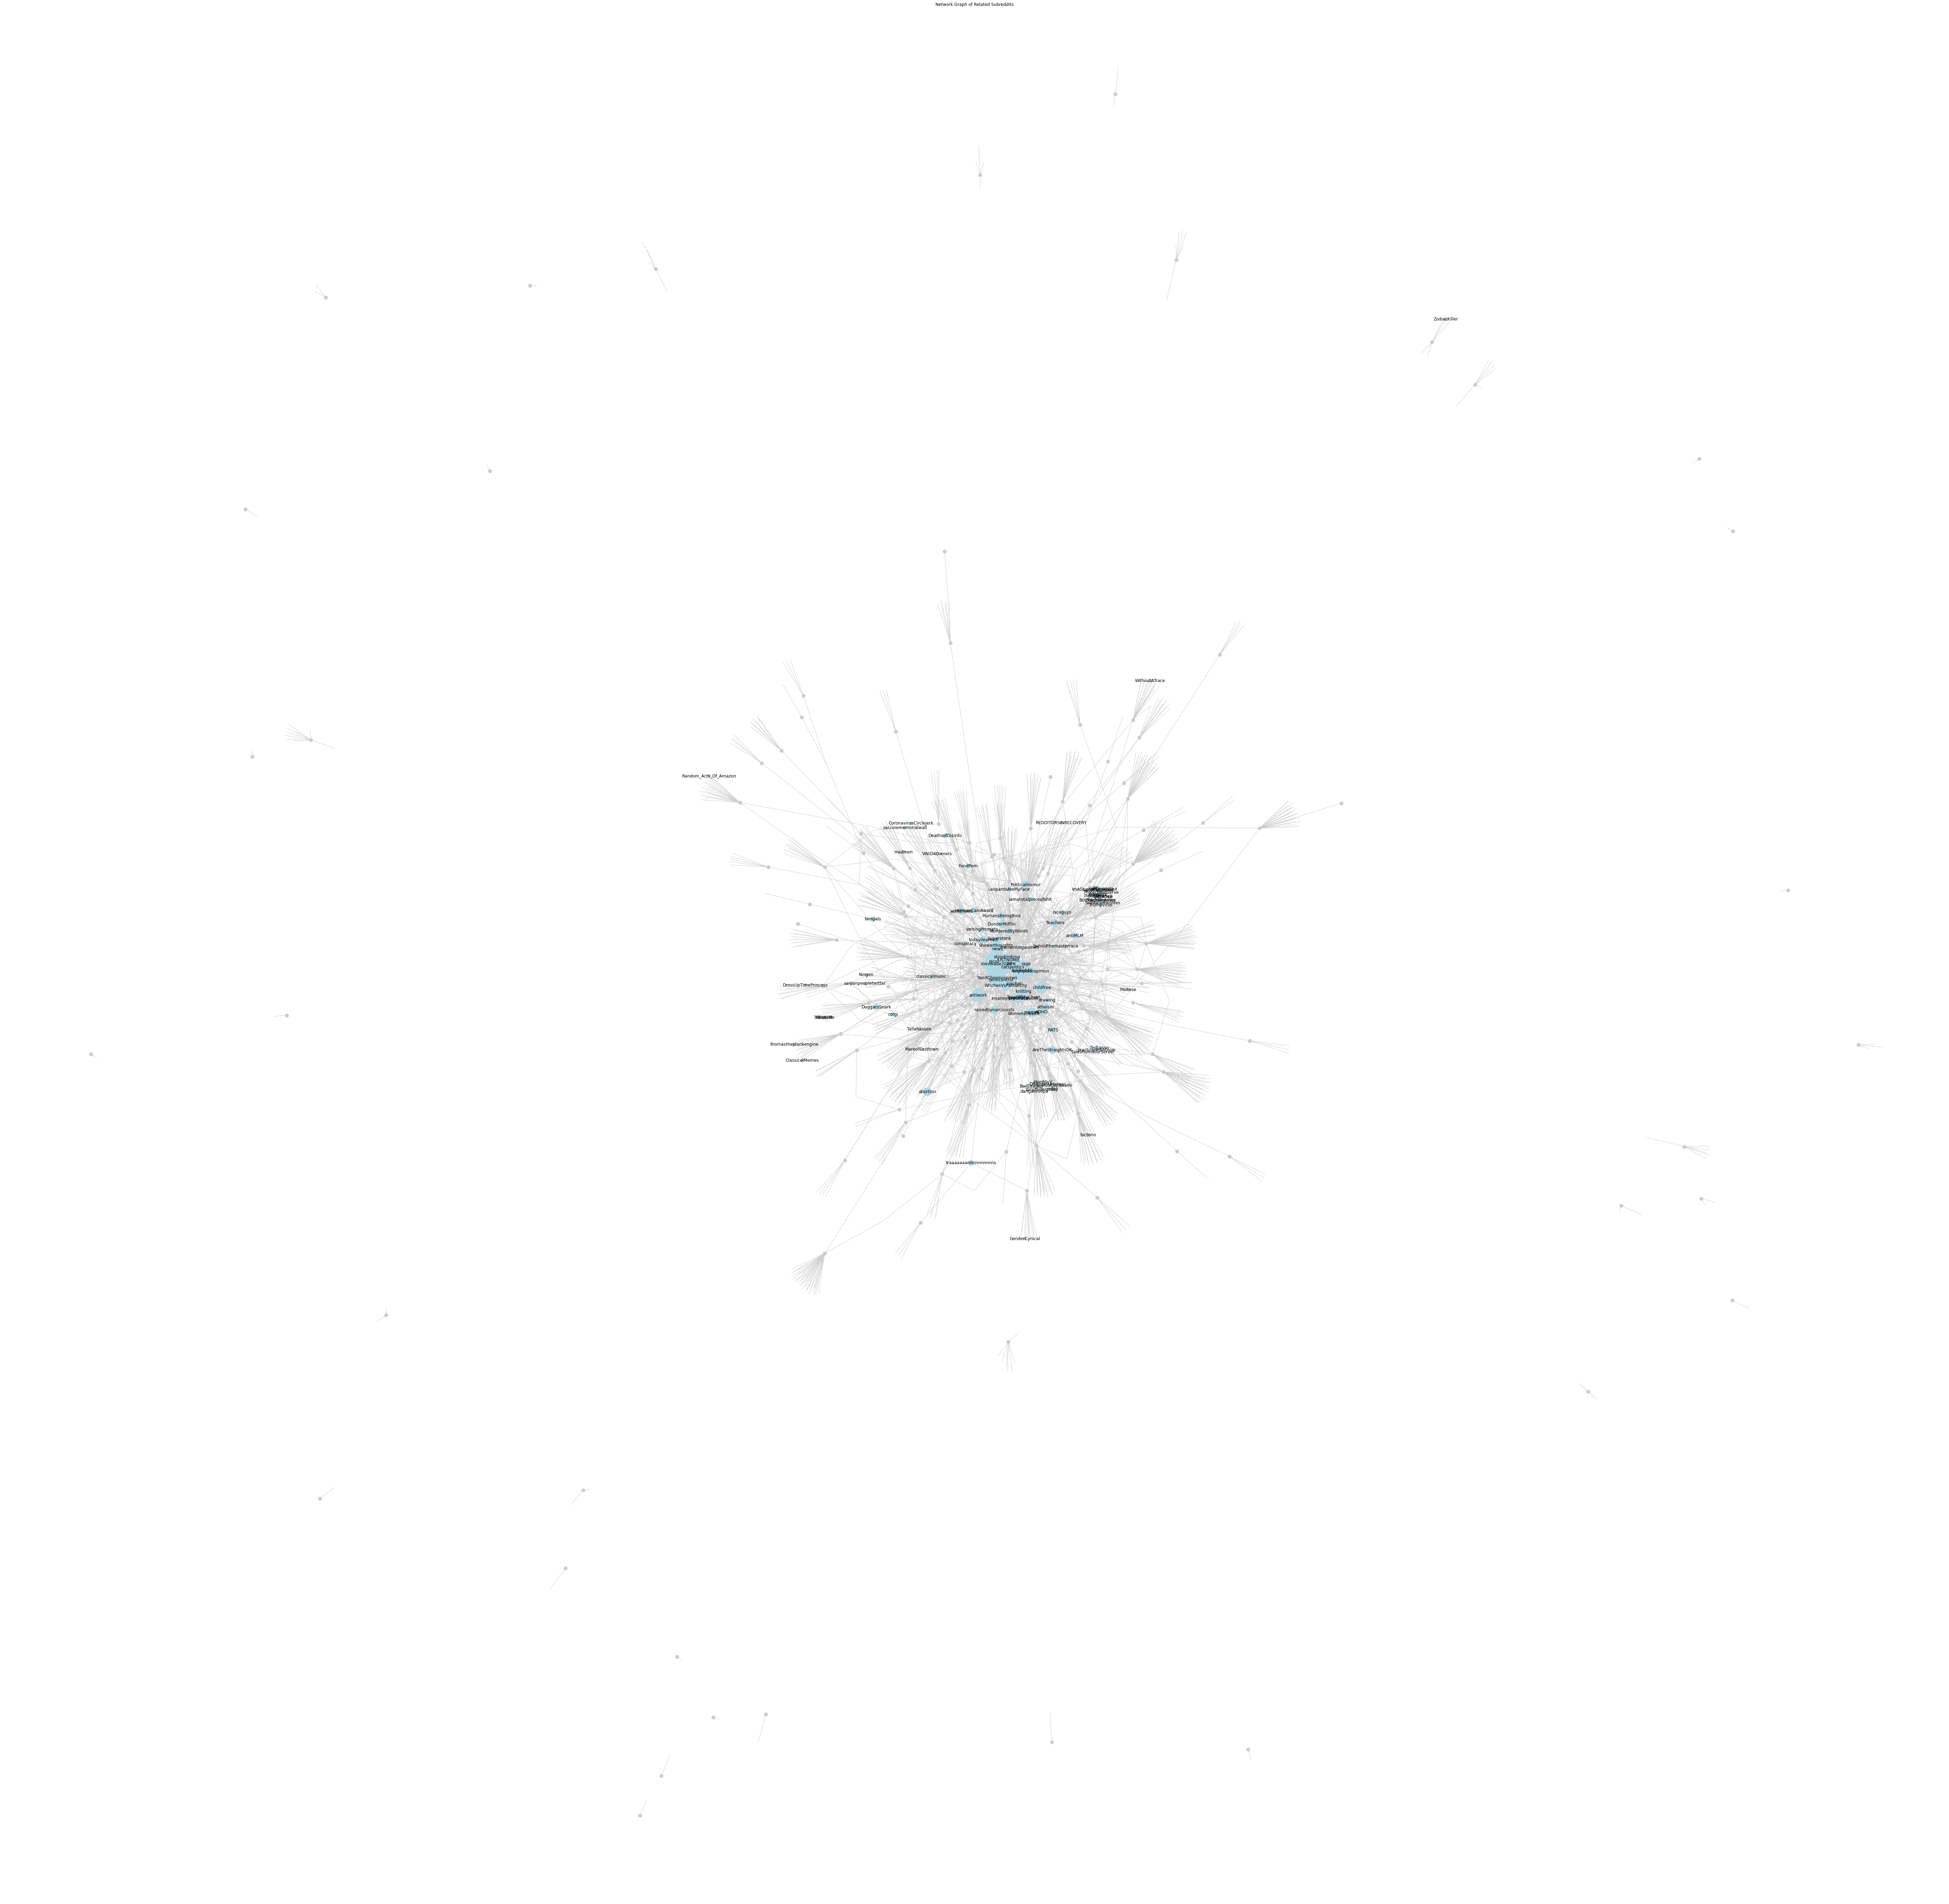

In [273]:
plt.figure(figsize=(100, 100))

# Create the graph from the dataframe
g = nx.from_pandas_edgelist(n_df, source='author', target='subreddit') 

# Create a layout for nodes 
layout = nx.spring_layout(g,iterations=50,scale=2)

# Draw the parts we want, edges thin and grey
# Influencers appear small and grey
# Subreddits appear in blue and sized according to their respective number of connections.
# Labels for subreddits ONLY
# People who have more connections are highlighted in color 

# Go through every subbreddit, ask the graph how many connections it has. 
# Multiply that by 80 to get the circle size
sub_size = [g.degree(sub) * 80 for sub in subs]
nx.draw_networkx_nodes(g, 
                       layout, 
                       nodelist=subs, 
                       node_size=sub_size, # a LIST of sizes, based on g.degree
                       node_color='lightblue')

# Draw all the entities 
nx.draw_networkx_nodes(g, layout, nodelist=u_authors, node_color='#cccccc', node_size=100)

# Draw highly connected influencers 
# popular_people = [person for person in u_authors if g.degree(person) > 1]
# nx.draw_networkx_nodes(g, layout, nodelist=popular_people, node_color='orange', node_size=100)

nx.draw_networkx_edges(g, layout, width=1, edge_color="#cccccc")

node_labels = dict(zip(subs, subs)) #labels for subs
nx.draw_networkx_labels(g, layout, labels=node_labels)

# No axis needed
plt.axis('off')
plt.title("Network Graph of Related Subreddits")
plt.savefig("NetworkGraph.jpeg", bbox_inches='tight',pad_inches=0.5)
plt.show()

In [263]:
top_50_subs = n_df['subreddit'].value_counts().head(50)
top_50_subs_df = pd.DataFrame(top_50_subs).reset_index()
top_50_subs_df.columns=[['subreddit','count']]
list_of_subs = []
for index, row in top_50_subs_df.iterrows(): 
    mylist = row.subreddit
    list_of_subs.append(mylist)
list_of_subs
new_df1 = n_df[n_df['subreddit'].isin(list_of_subs)]
new_df1
u_authors1=new_df1.author.unique()

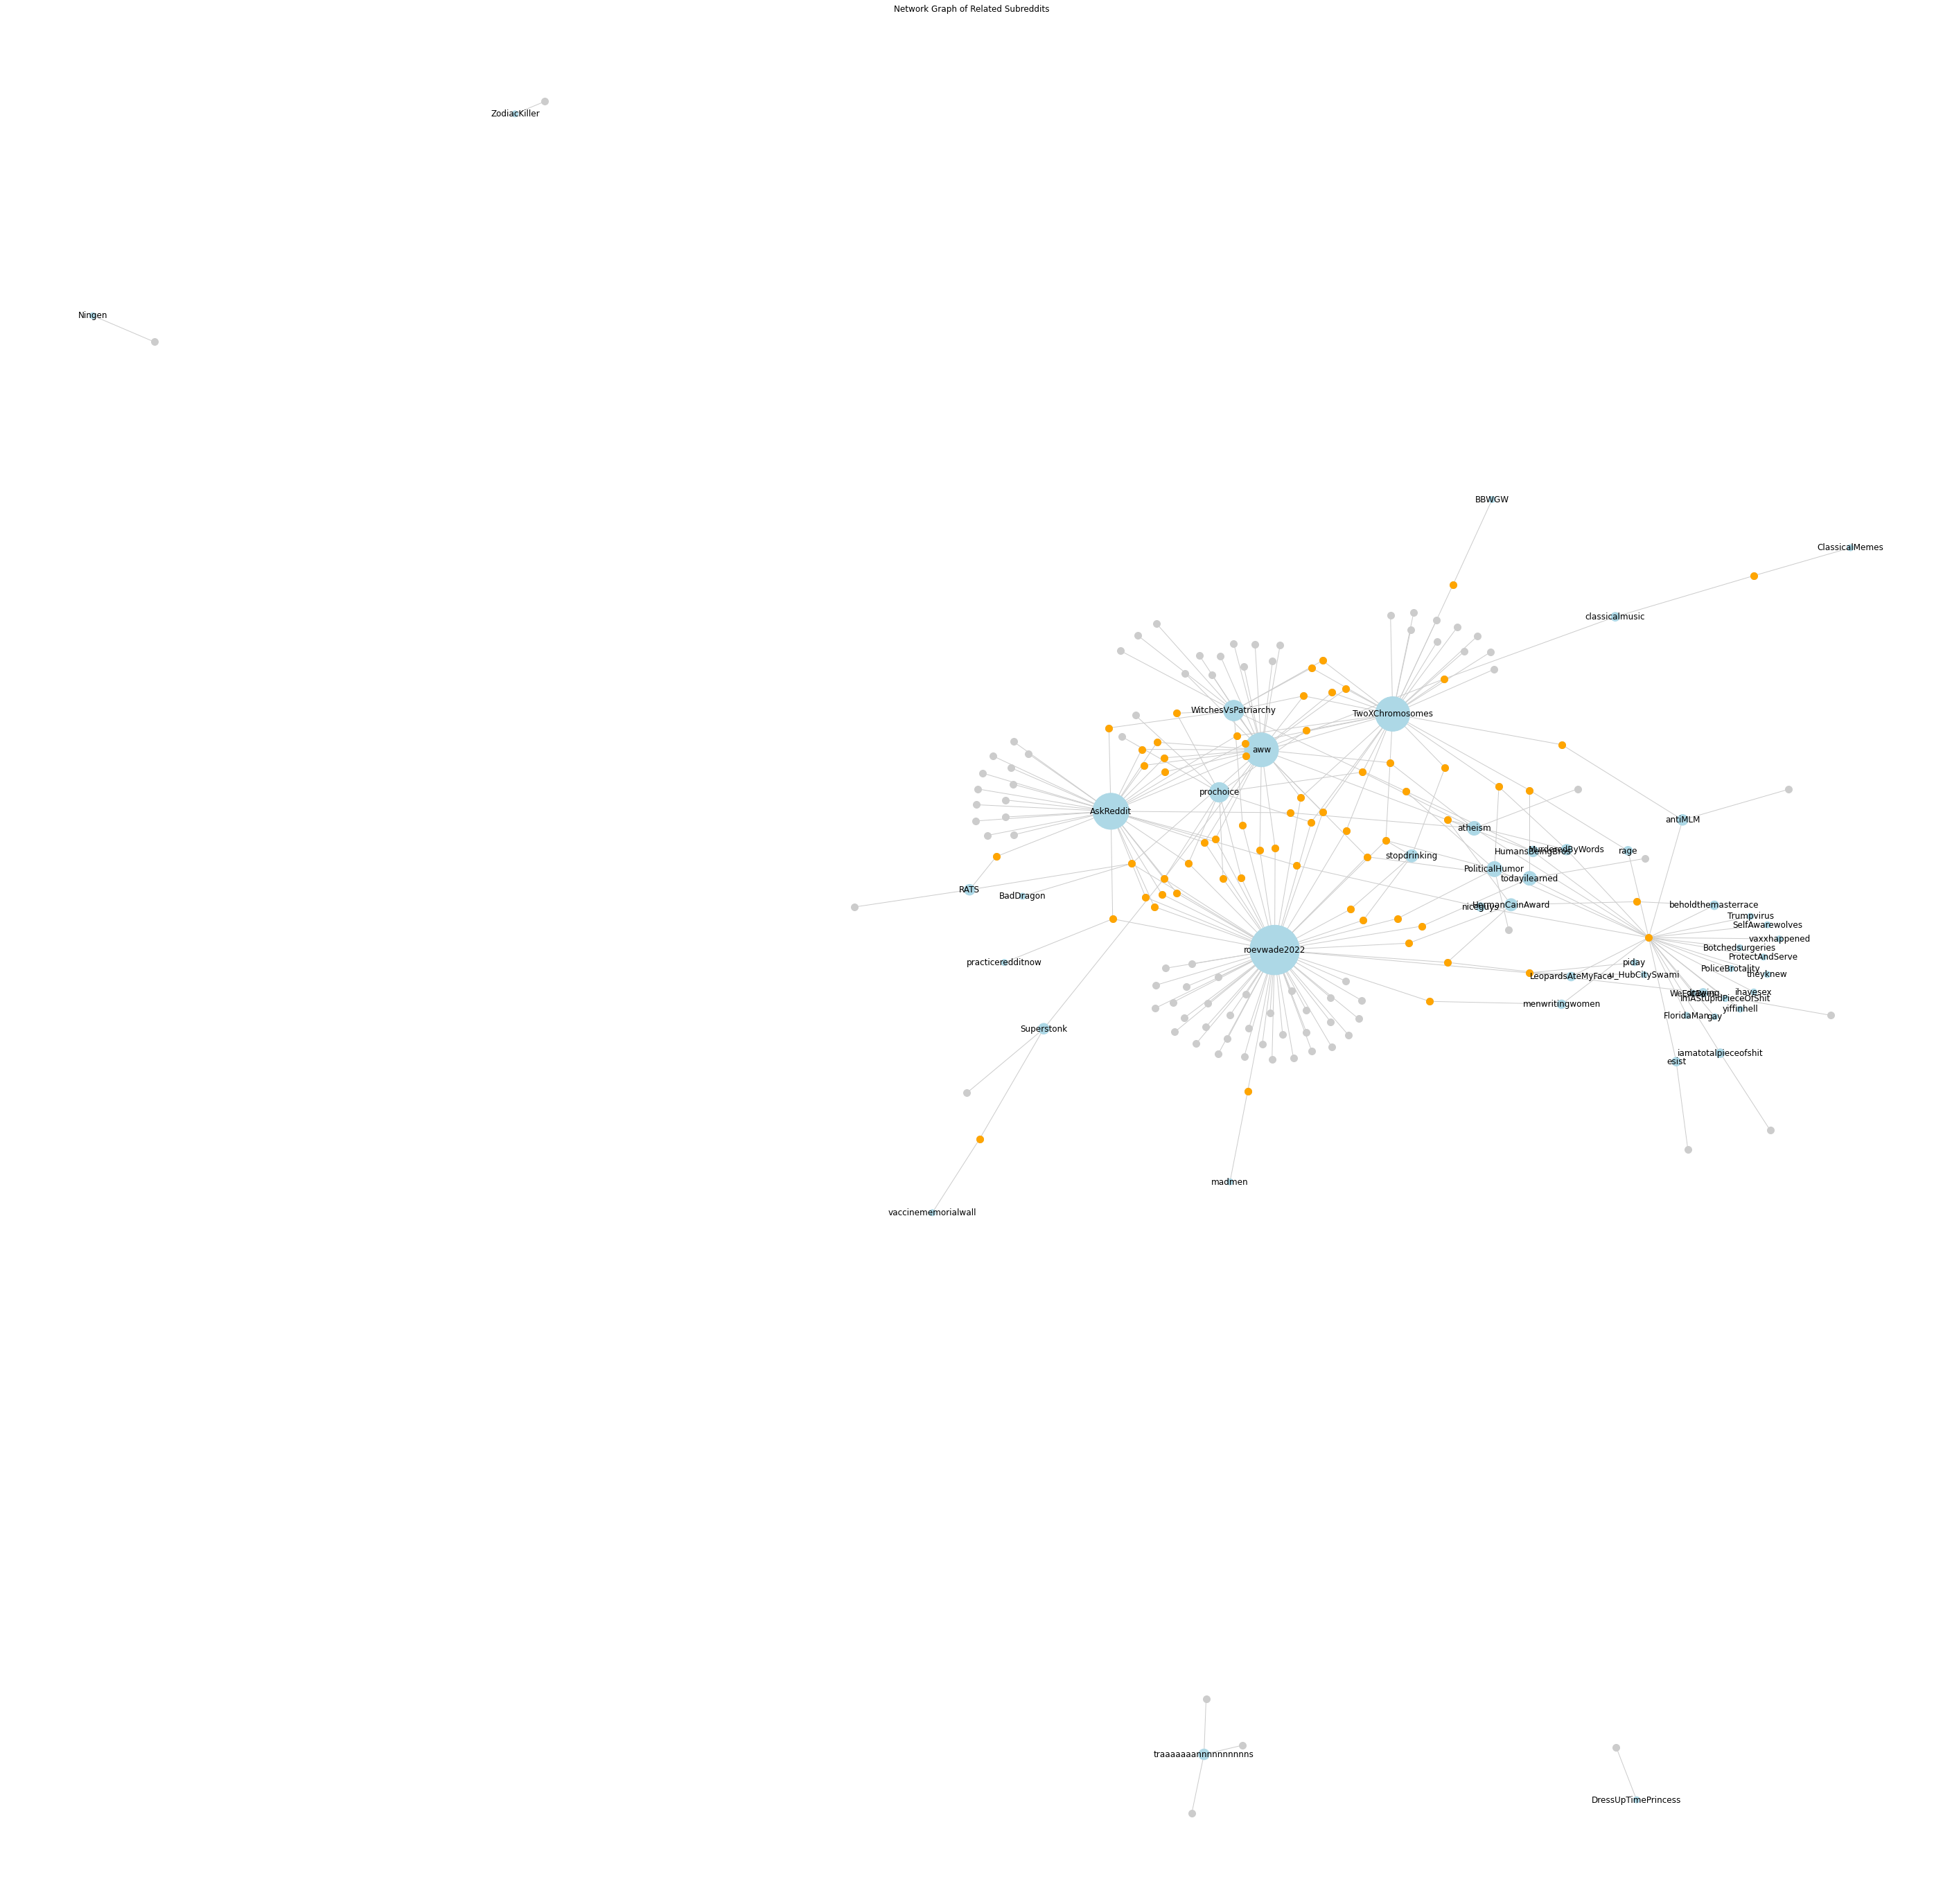

In [274]:
plt.figure(figsize=(50, 50))

# Create the graph from the dataframe
g = nx.from_pandas_edgelist(new_df1, source='author', target='subreddit') 

# Create a layout for nodes 
layout = nx.spring_layout(g,iterations=50,scale=2)

# Draw the parts we want, edges thin and grey
# Influencers appear small and grey
# Subreddits appear in blue and sized according to their respective number of connections.
# Labels for subreddits ONLY
# People who have more connections are highlighted in color 

# Go through every subbreddit, ask the graph how many connections it has. 
# Multiply that by 80 to get the circle size
sub_size = [g.degree(sub) * 80 for sub in list_of_subs]
nx.draw_networkx_nodes(g, 
                       layout, 
                       nodelist=list_of_subs, 
                       node_size=sub_size, # a LIST of sizes, based on g.degree
                       node_color='lightblue')

# Draw all the entities 
nx.draw_networkx_nodes(g, layout, nodelist=u_authors1, node_color='#cccccc', node_size=100)

# Draw highly connected influencers 
popular_people = [person for person in u_authors1 if g.degree(person) > 1]
nx.draw_networkx_nodes(g, layout, nodelist=popular_people, node_color='orange', node_size=100)

nx.draw_networkx_edges(g, layout, width=1, edge_color="#cccccc")

node_labels = dict(zip(list_of_subs, list_of_subs)) #labels for subs
nx.draw_networkx_labels(g, layout, labels=node_labels)

# No axis needed
plt.axis('off')
plt.title("Network Graph of Related Subreddits")
plt.savefig("NetworkGraph2.jpeg", bbox_inches='tight',pad_inches=0.5)
plt.show()

## RoevwadeCelebration

In [275]:
comments_cel=pd.read_csv('comments_celebration.csv',index_col=[0])
posts_cel=pd.read_csv('posts_celebration.csv',index_col=[0])

In [278]:
posts_cel.head(5)

,id,score,text,author,num_comments,ups,downs,subreddit
0,uh9fe4,202,:),Scully-maxxing,29,202,0,RoevWadeCelebration
1,uh9n86,128,Anyone else think this is what it must have felt like when Lincoln freed the slaves?,Own_Bathroom1636,100,128,0,RoevWadeCelebration
2,uhg6fp,113,UOHOHOHUEE 😭😭😭😭😭,epickeanuchungus,21,113,0,RoevWadeCelebration
3,uhguof,99,History will look upon us kindly,Thadlust,81,99,0,RoevWadeCelebration
4,uhmft4,92,Life on Mars,Anxious-Wrangler-922,63,92,0,RoevWadeCelebration


In [279]:
comments_cel.head(5)

,id,score,text,ups,downs,author,subreddit
0,i74lqps,26,Shoutout snakebaked,26,0,Scully-maxxing,RoevWadeCelebration
1,i74rm09,13,Im here cuz colaws repubbed,13,0,Ok-Interaction-7180,RoevWadeCelebration
2,i75173d,12,she's in hell because she did not embrace allah and his prophet PBUH,12,0,JeddahWR,RoevWadeCelebration
3,i76lnwo,7,She is burning in hell ❤️❤️❤️❤️,7,0,half_shattered,RoevWadeCelebration
4,i74myys,6,Bahahahah,6,0,MNxLegion,RoevWadeCelebration


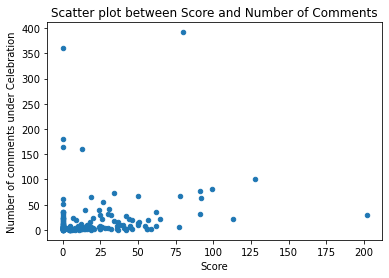

In [290]:
# See the relationship between comments and upvotes on the posts
ax = posts_cel.plot('score', 'num_comments', kind = 'scatter', title='Scatter plot between Score and Number of Comments')
ax.set(xlabel="Score", ylabel="Number of comments under Celebration")
plt.savefig("ScatterPlotCelebration",dpi=150, bbox_inches='tight',pad_inches=0.5)

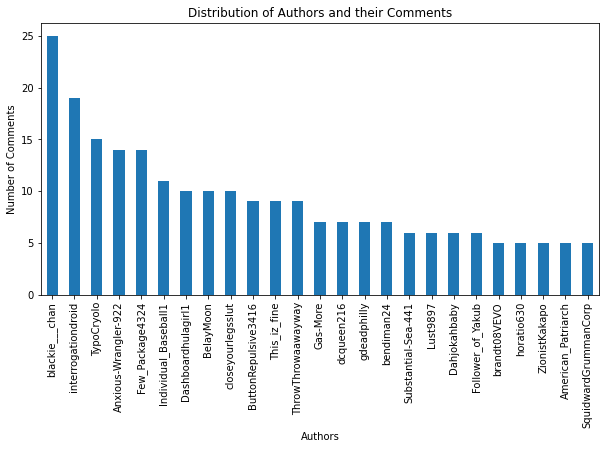

In [289]:
repeating_commentors_cel = comments_cel[comments_cel.duplicated(['author'], keep = False)] # Only take users who commented more than once
repeating_commentors_cel = repeating_commentors_cel[repeating_commentors_cel.author != 'None'] # Get rid of deleted users
repeating_commentors_cel.author.nunique() # Out of 500 posts, this is the amount of people who posted more than once 
# See the distrubution of authors and their posts
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(10)
ax1 = repeating_commentors_cel.author.value_counts().head(25).plot(kind='bar',title='Distribution of Authors and their Comments') 
ax1.set(xlabel="Authors", ylabel="Number of Comments")
plt.savefig("top25commentorsCelebration.png",dpi=150, bbox_inches='tight',pad_inches=0.5)

## Witches

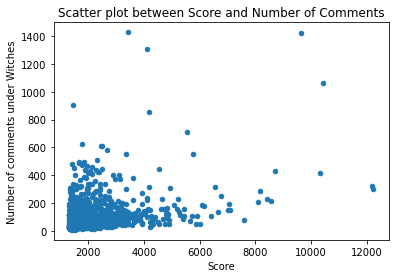

In [288]:
posts_w=pd.read_csv('posts_witches.csv',index_col=[0])
# See the relationship between comments and upvotes on the posts
ax = posts_w.plot('score', 'num_comments', kind = 'scatter', title='Scatter plot between Score and Number of Comments')
ax.set(xlabel="Score", ylabel="Number of comments under Witches")
plt.savefig("ScatterPlotWitches",dpi=150, bbox_inches='tight',pad_inches=0.5)

In [293]:
top_30_subs = n_df['subreddit'].value_counts().head(30)
top_30_subs_df = pd.DataFrame(top_30_subs).reset_index()
top_30_subs_df.columns=[['subreddit','count']]
list_of_subs1 = []
for index, row in top_30_subs_df.iterrows(): 
    mylist1 = row.subreddit
    list_of_subs1.append(mylist1)
list_of_subs1
new_df2 = n_df[n_df['subreddit'].isin(list_of_subs1)]
new_df2
u_authors2=new_df2.author.unique()

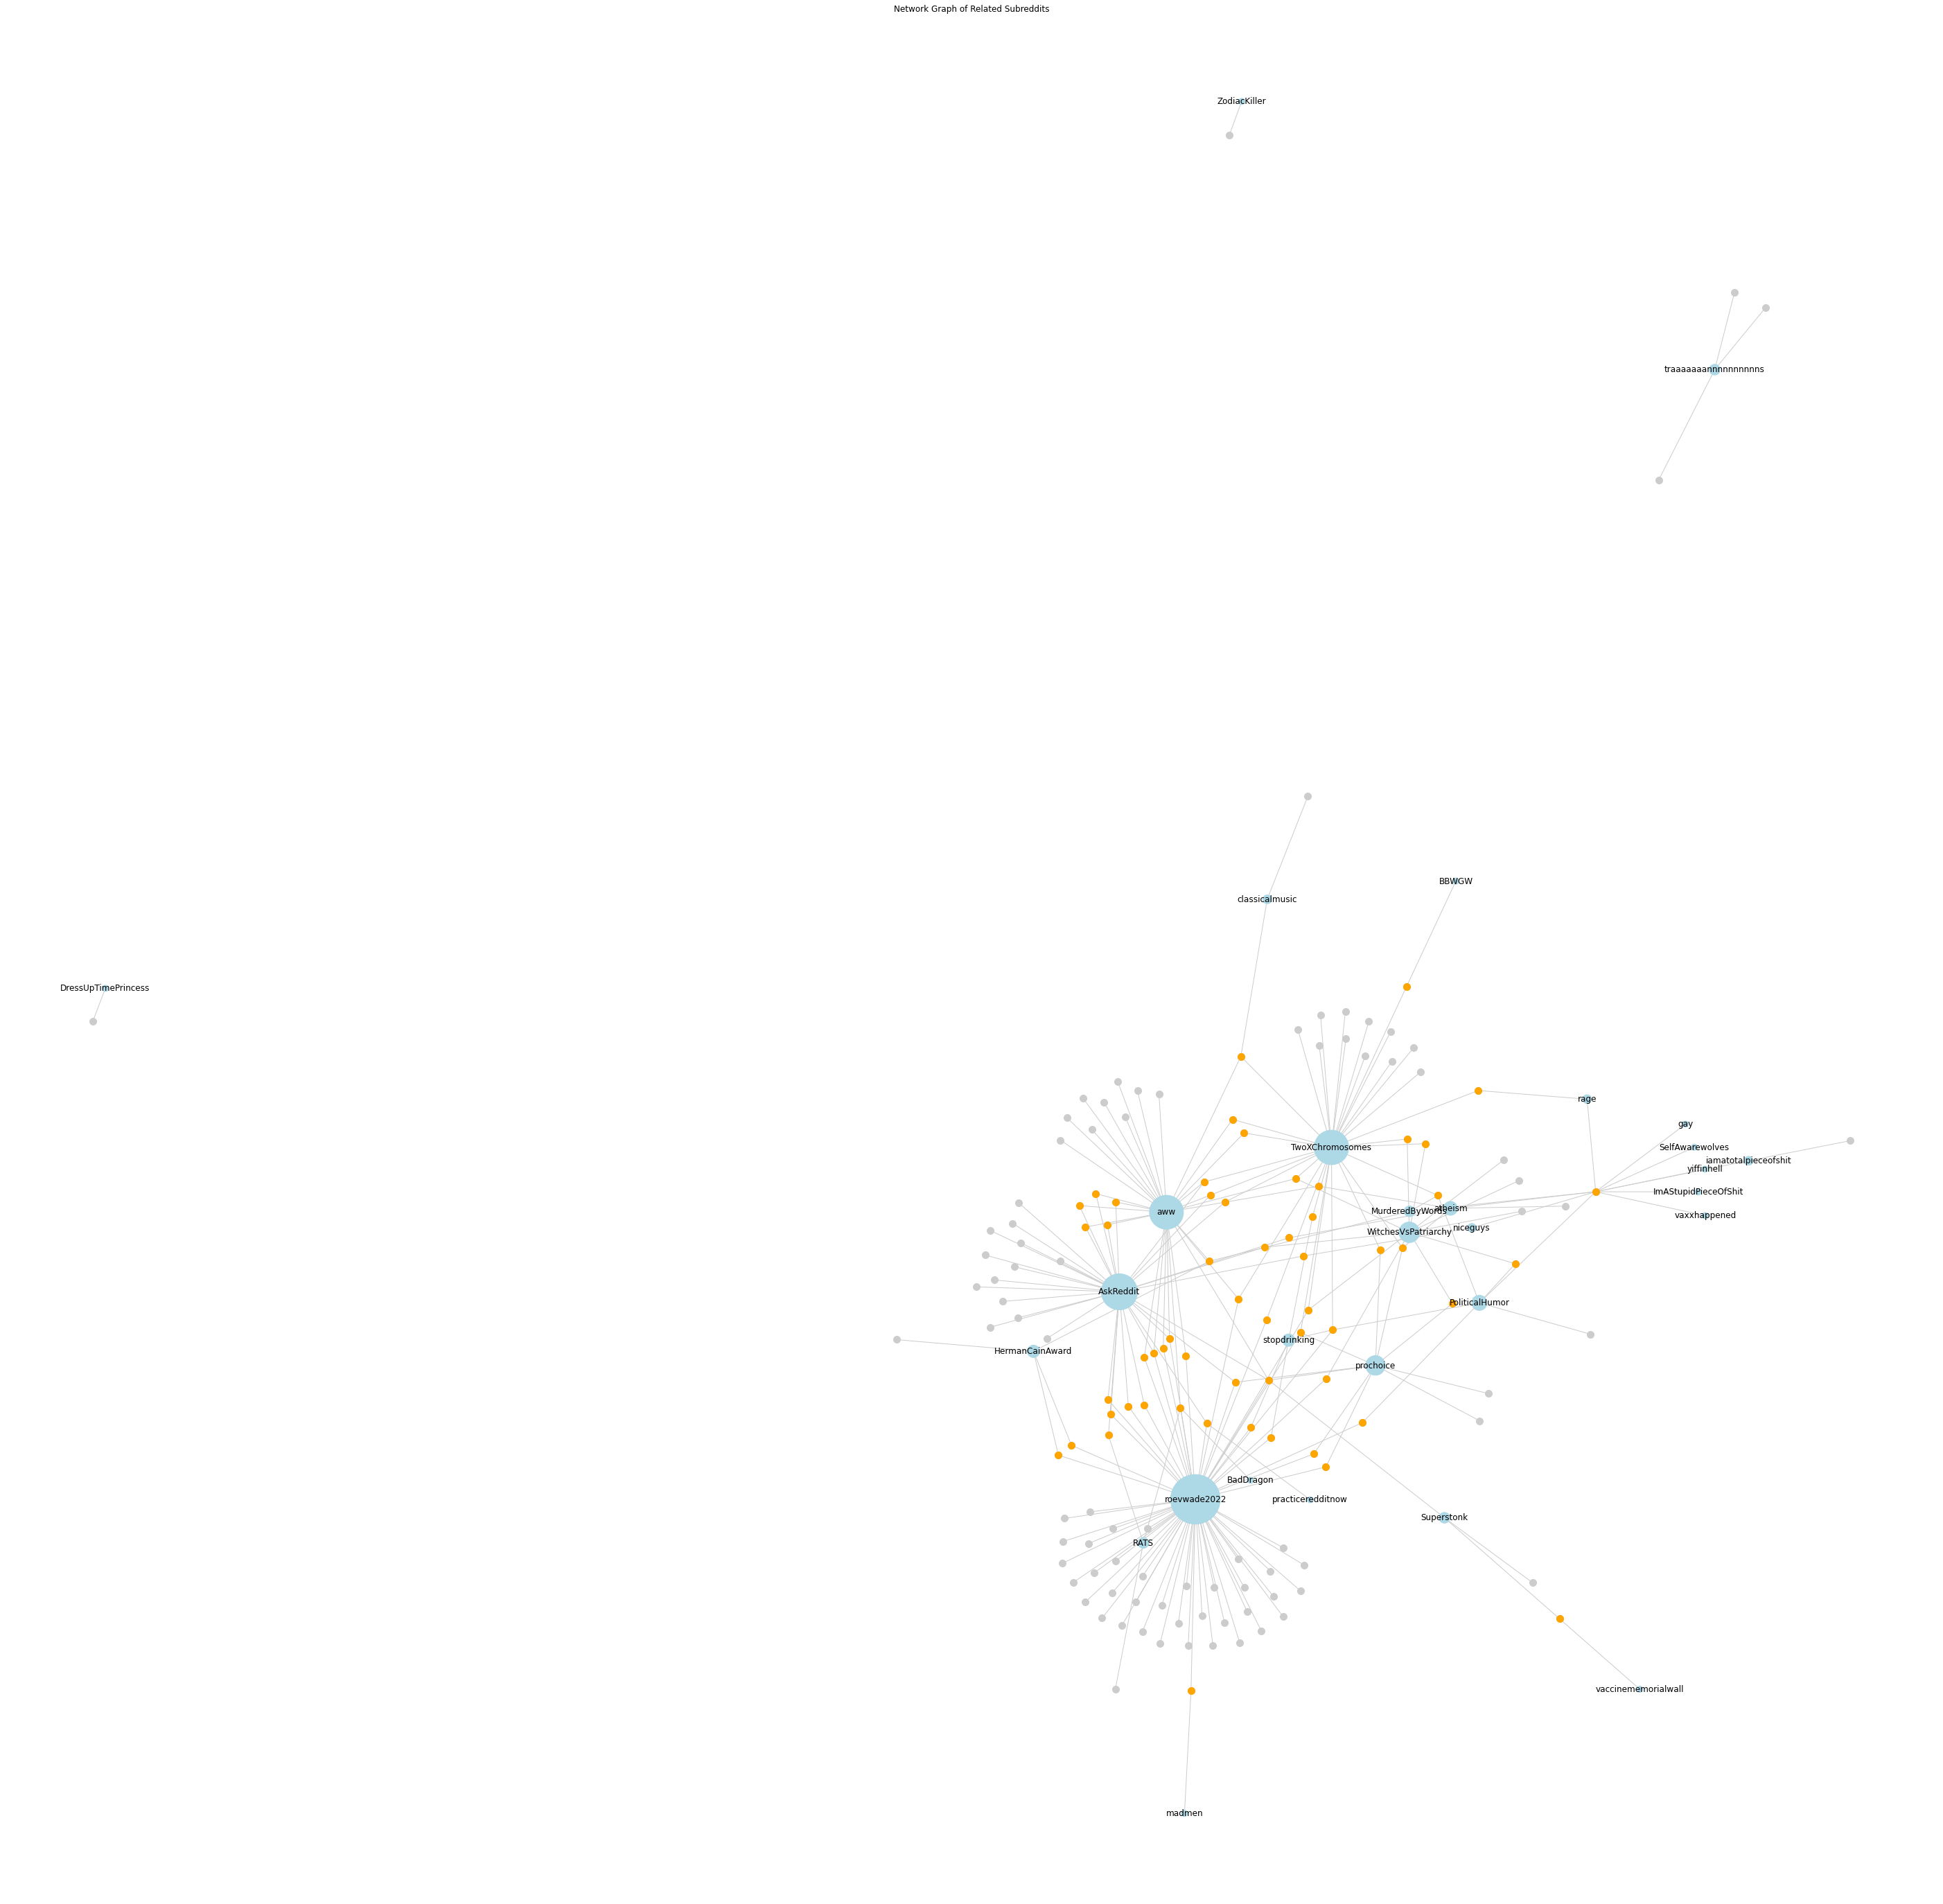

In [294]:
plt.figure(figsize=(50, 50))

# Create the graph from the dataframe
g = nx.from_pandas_edgelist(new_df2, source='author', target='subreddit') 

# Create a layout for nodes 
layout = nx.spring_layout(g,iterations=50,scale=2)

# Draw the parts we want, edges thin and grey
# Influencers appear small and grey
# Subreddits appear in blue and sized according to their respective number of connections.
# Labels for subreddits ONLY
# People who have more connections are highlighted in color 

# Go through every subbreddit, ask the graph how many connections it has. 
# Multiply that by 80 to get the circle size
sub_size = [g.degree(sub) * 80 for sub in list_of_subs1]
nx.draw_networkx_nodes(g, 
                       layout, 
                       nodelist=list_of_subs1, 
                       node_size=sub_size, # a LIST of sizes, based on g.degree
                       node_color='lightblue')

# Draw all the entities 
nx.draw_networkx_nodes(g, layout, nodelist=u_authors2, node_color='#cccccc', node_size=100)

# Draw highly connected influencers 
popular_people = [person for person in u_authors2 if g.degree(person) > 1]
nx.draw_networkx_nodes(g, layout, nodelist=popular_people, node_color='orange', node_size=100)

nx.draw_networkx_edges(g, layout, width=1, edge_color="#cccccc")

node_labels = dict(zip(list_of_subs1, list_of_subs1)) #labels for subs
nx.draw_networkx_labels(g, layout, labels=node_labels)

# No axis needed
plt.axis('off')
plt.title("Network Graph of Related Subreddits")
plt.savefig("NetworkGraph3.jpeg", bbox_inches='tight',pad_inches=0.5)
plt.show()